In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
earth = pd.read_csv("Supplement_MnO_Cal_Input_outliers_wvl.csv")
mars = pd.read_csv("ChemCam_sol0-2890.csv")
target = pd.read_csv("ccam-libs-calibration-moc-v3-for-pds.csv")

/var/folders/rb/kxt2pvjx7bb3mg6mbyj8fhzc0000gn/T/ipykernel_36087/2518500576.py:1: DtypeWarning: Columns (1,4,5,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  earth = pd.read_csv("Supplement_MnO_Cal_Input_outliers_wvl.csv")
/var/folders/rb/kxt2pvjx7bb3mg6mbyj8fhzc0000gn/T/ipykernel_36087/2518500576.py:2: DtypeWarning: Columns (1,2,4,6,9,10,11,13,15,16,17,19,20,21,24,25,26,28,29,30,31,33,34,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  mars = pd.read_csv("ChemCam_sol0-2890.csv")


In [3]:
pd.set_option('display.max_columns', 500)
target.dropna(inplace=True)
target.head()

,Target,Spectrum Name,Sample Name,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,MOC total,Used for 2015 calibration,Used for 2021 Mn calibration,Used for 2022 Li calibration
0,AGV2,AGV2,AGV2,59.3,1.05,16.91,6.02,0.099,1.79,5.20,4.19,2.88,97.44,1.0,1.0,1.0
1,BCR-2,BCR2,BCR2,54.1,2.26,13.50,12.42,0.200,3.59,7.12,3.16,1.79,98.14,1.0,1.0,1.0
2,BEN,BEN,BEN,38.2,2.61,10.07,11.61,0.200,13.15,13.87,3.18,1.39,94.28,1.0,1.0,1.0
3,BHVO2,BHVO2,BHVO2,49.9,2.73,13.50,11.07,0.167,7.23,11.40,2.22,0.52,98.74,1.0,1.0,1.0
4,BIR-1a,BIR1,BIR1,47.7,0.97,15.40,10.19,0.176,9.7,13.40,1.81,0.03,99.38,1.0,1.0,1.0


In [4]:
n_target = target["Target"].nunique()
print(f"We have {n_target} unique targets")

We have 390 unique targets


In [5]:
'''Change object type to float'''
target = target.astype({"SiO2":float,"TiO2":float,"Al2O3":float,"FeOT":float,"MnO":float,"MgO":float,"CaO":float,"Na2O":float,"K2O":float, "MOC total":float})

In [6]:
'''add other columns for remaining composition in each target'''
new_col = 100 - target.loc[:,["MOC total"]]
target.insert(loc=12, column="other",value= new_col)
target.head()

,Target,Spectrum Name,Sample Name,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,other,MOC total,Used for 2015 calibration,Used for 2021 Mn calibration,Used for 2022 Li calibration
0,AGV2,AGV2,AGV2,59.3,1.05,16.91,6.02,0.099,1.79,5.20,4.19,2.88,2.56,97.44,1.0,1.0,1.0
1,BCR-2,BCR2,BCR2,54.1,2.26,13.50,12.42,0.200,3.59,7.12,3.16,1.79,1.86,98.14,1.0,1.0,1.0
2,BEN,BEN,BEN,38.2,2.61,10.07,11.61,0.200,13.15,13.87,3.18,1.39,5.72,94.28,1.0,1.0,1.0
3,BHVO2,BHVO2,BHVO2,49.9,2.73,13.50,11.07,0.167,7.23,11.40,2.22,0.52,1.26,98.74,1.0,1.0,1.0
4,BIR-1a,BIR1,BIR1,47.7,0.97,15.40,10.19,0.176,9.70,13.40,1.81,0.03,0.62,99.38,1.0,1.0,1.0


In [7]:
'''Dictionary of id to target names'''
id_to_target = {}
for i, t in enumerate(target["Target"]):
    id_to_target[i] = t

In [8]:
"""given a target id, return its compo as a list following the order of data frame"""
id_to_oxide = {0:"SiO2",1:"TiO2",2:"Al2O3",3:"FeOT",4:"MnO",5:"MgO",6:"CaO",7:"Na2O",9:"K2O",10:"other"}
def get_compo_as_list(target_id):
    return list(target.iloc[target_id,3:13])

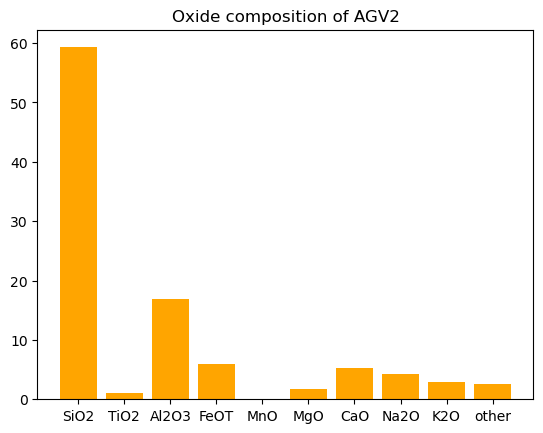

In [9]:
'''Histograms of targets'''
def make_hist_target(target_id):
    plt.figure()
    df = pd.DataFrame({"composition":list(target.columns[3:13]), "values":target.iloc[target_id,3:13]})
    #axs[,i%2].bar(x=df["composition"], height=df["values"], color="orange")
    plt.bar(x=df["composition"], height=df["values"], color="orange")
    plt.title(f"Oxide composition of {id_to_target[target_id]}")
    plt.show()
make_hist_target(0)

In [10]:
'''filter earth spectra with targets for which composition is known'''
earth_known = earth[earth["meta"].isin(target["Target"])]
earth_known["meta"].value_counts().sort_values(ascending=True)

MIX5B          4
1413           4
MO-12          5
1426           5
GBW07315       5
              ..
Shergottite    5
Swy-1          5
SRM88b         5
Picrite        5
GBW07110       5
Name: meta, Length: 382, dtype: int64

In [13]:
# '''same for mars'''
# mars_known = mars[mars["Target"].isin(target["Target"])]
# mars_known["Target"].value_counts().sort_values(ascending=True)

In [14]:
'''define ranges of spectrometers'''
vnir_range = pd.Interval(left=492.427,right=849.0,closed="both")
vio_range = pd.Interval(left=382.13,right=473.184,closed="both")
uv_range = pd.Interval(left=246.635,right=338.457,closed="both")

In [16]:
'''dictionary of known earth targets'''
earth_target_to_ids = {}
for i, t in enumerate(earth_known["meta"]):
    if t in earth_target_to_ids:
        earth_target_to_ids[t].append(earth_known.index[i])
    else:
        earth_target_to_ids[t] = [earth_known.index[i]]

In [17]:
id_to_oxide

{0: 'SiO2',
 1: 'TiO2',
 2: 'Al2O3',
 3: 'FeOT',
 4: 'MnO',
 5: 'MgO',
 6: 'CaO',
 7: 'Na2O',
 9: 'K2O',
 10: 'other'}

In [421]:
for i in range(len(target)):
    print(id_to_oxide[np.argmax(get_compo_as_list(i))])

SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
CaO
SiO2
SiO2
K2O
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
K2O
MnO
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
FeOT
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2
SiO2

In [18]:
'''only keep wavelength'''
earth_wvl = earth_known[[col for col in earth_known if col.startswith('wvl')]]
earth_wvl.columns = earth.iloc[0,-6144:]

mars_wvl = mars[[col for col in mars if col.startswith('wvl')]]
mars_wvl.columns = mars_wvl.iloc[0]
mars_wvl.drop(0,inplace=True)

/var/folders/rb/kxt2pvjx7bb3mg6mbyj8fhzc0000gn/T/ipykernel_36087/2399329457.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mars_wvl.drop(0,inplace=True)


In [26]:
'''define spectra by range and normalized version for earth and mars'''
earth_vnir = earth_wvl[[cols for cols in earth_wvl if cols in vnir_range]]
earth_vnir_s = earth_vnir.div(earth_vnir.sum(axis=1), axis=0)
earth_vio = earth_wvl[[cols for cols in earth_wvl if cols in vio_range]]
earth_vio_s = earth_vio.div(earth_vio.sum(axis=1), axis=0)
earth_uv = earth_wvl[[cols for cols in earth_wvl if cols in uv_range]]
earth_uv_s = earth_uv.div(earth_uv.sum(axis=1), axis=0)

'''Now for Mars'''
mars_vnir = mars_wvl[[cols for cols in mars_wvl if cols in vnir_range]]
mars_vnir_s = mars_vnir.div(mars_vnir.sum(axis=1), axis=0)
mars_vio = mars_wvl[[cols for cols in mars_wvl if cols in vio_range]]
mars_vio_s = mars_vio.div(mars_vio.sum(axis=1), axis=0)
mars_uv = mars_wvl[[cols for cols in mars_wvl if cols in uv_range]]
mars_uv_s = mars_uv.div(mars_uv.sum(axis=1), axis=0)

5
5


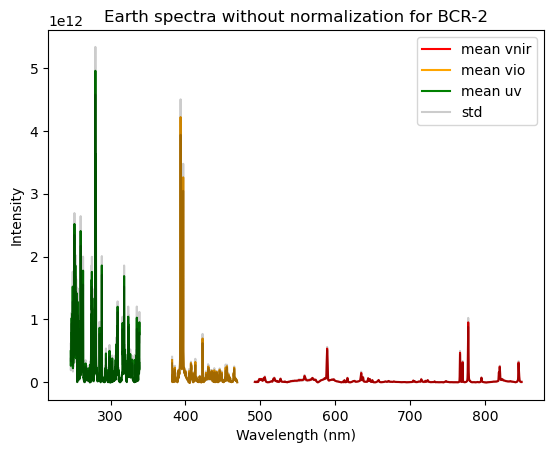

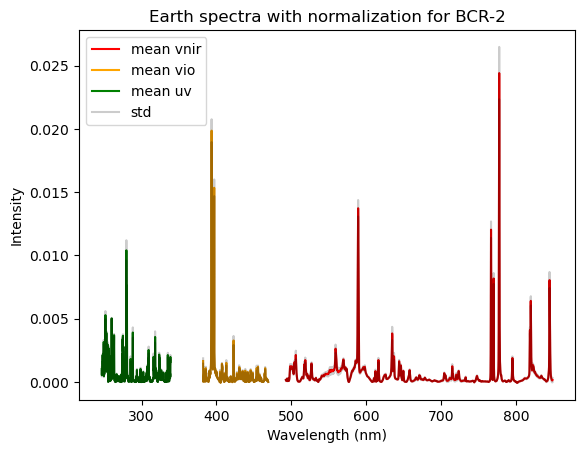

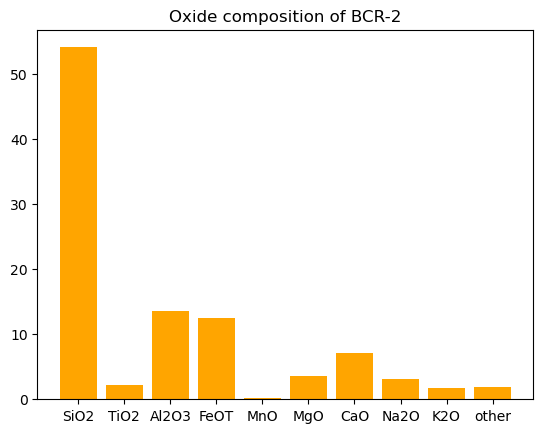

In [24]:
'''function to plot spectras

Input: 
    - target_id: integer corresponding to a unique target name
    - is_normalized: Boolean --> True if want spectras to be normalized by range (UV, VNIR, VIO)
    
Return:

    - mean spectras (per range) together with standard-deviation among the spectras 
    corresponfing to the target name.

'''

def plot_spectra_earth(target_id, is_normalized=True):
    N_spectra = len(earth_target_to_ids[id_to_target[target_id]])
    spectras_vnir = []
    spectras_uv = []
    spectras_vio = []
    
    if is_normalized:
        for ids in earth_target_to_ids[id_to_target[target_id]]:
            spectras_vnir.append(earth_vnir_s.loc[ids,:])
            spectras_uv.append(earth_uv_s.loc[ids,:])
            spectras_vio.append(earth_vio_s.loc[ids,:])

        plt.figure()
        plt.plot(earth_vnir_s.columns,np.mean(spectras_vnir,axis=0),label="mean vnir", color="red")  
        plt.plot(earth_vio_s.columns,np.mean(spectras_vio,axis=0),label="mean vio", color="orange")   ##Mean spectras by range
        plt.plot(earth_uv_s.columns,np.mean(spectras_uv,axis=0),label="mean uv", color="green")

        plt.plot(earth_vnir_s.columns,np.mean(spectras_vnir,axis=0) + np.std(spectras_vnir,axis=0), c="black",alpha=0.2)
        plt.plot(earth_vnir_s.columns,np.mean(spectras_vnir,axis=0) - np.std(spectras_vnir,axis=0),c="black",alpha=0.2)

        plt.plot(earth_vio_s.columns,np.mean(spectras_vio,axis=0) + np.std(spectras_vio,axis=0),c="black", alpha=0.2)
        plt.plot(earth_vio_s.columns,np.mean(spectras_vio,axis=0) - np.std(spectras_vio,axis=0),c="black", alpha=0.2)

        plt.plot(earth_uv_s.columns,np.mean(spectras_uv,axis=0) + np.std(spectras_uv,axis=0),label="std", alpha=0.2, c="black")
        plt.plot(earth_uv_s.columns,np.mean(spectras_uv,axis=0) - np.std(spectras_uv,axis=0), c="black",alpha=0.2)
        plt.title(f"Earth spectra with normalization for {id_to_target[target_id]}")
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Intensity")
        plt.legend()
    
    else:
        for ids in earth_target_to_ids[id_to_target[target_id]]:
            spectras_vnir.append(earth_vnir.loc[ids,:])
            spectras_uv.append(earth_uv.loc[ids,:])
            spectras_vio.append(earth_vio.loc[ids,:])

        plt.figure()
        plt.plot(earth_vnir.columns,np.mean(spectras_vnir,axis=0),color="red",label="mean vnir")  
        plt.plot(earth_vio.columns,np.mean(spectras_vio,axis=0),label="mean vio", color="orange")   ##Mean spectras by range
        plt.plot(earth_uv.columns,np.mean(spectras_uv,axis=0),label="mean uv",color="green")

        plt.plot(earth_vnir.columns,np.mean(spectras_vnir,axis=0) + np.std(spectras_vnir,axis=0),label="std",c="black",alpha=0.2)
        plt.plot(earth_vnir.columns,np.mean(spectras_vnir,axis=0) - np.std(spectras_vnir,axis=0),c="black",alpha=0.2)

        plt.plot(earth_vio.columns,np.mean(spectras_vio,axis=0) + np.std(spectras_vio,axis=0),c="black",alpha=0.2)
        plt.plot(earth_vio.columns,np.mean(spectras_vio,axis=0) - np.std(spectras_vio,axis=0),c="black",alpha=0.2)

        plt.plot(earth_uv.columns,np.mean(spectras_uv,axis=0) + np.std(spectras_uv,axis=0),c="black",alpha=0.2)
        plt.plot(earth_uv.columns,np.mean(spectras_uv,axis=0) - np.std(spectras_uv,axis=0),c="black",alpha=0.2)
        plt.title(f"Earth spectra without normalization for {id_to_target[target_id]}")
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Intensity")
        plt.legend()
        
        
#     plt.plot(earth_vnir_s.columns,earth_vnir_s.iloc[0,:], label="vnir")
#     plt.plot(earth_vio_s.columns,earth_vio_s.iloc[0,:], label="vio")
#     plt.plot(earth_uv_s.columns,earth_uv_s.iloc[0,:], label="uv")
#     plt.title("Earth spectra normalized")
#     plt.legend()

#     plt.figure()
#     plt.yscale("log")
#     plt.plot(earth_vnir.columns,earth_vnir.iloc[0,:], label="vnir")
#     plt.plot(earth_vio.columns,earth_vio.iloc[0,:], label="vio")
#     plt.plot(earth_uv.columns,earth_uv.iloc[0,:], label="uv")
#     plt.title("Earth spectra")
#     plt.legend()

plot_spectra_earth(1,is_normalized=False)
plot_spectra_earth(1,is_normalized=True)
make_hist_target(1)

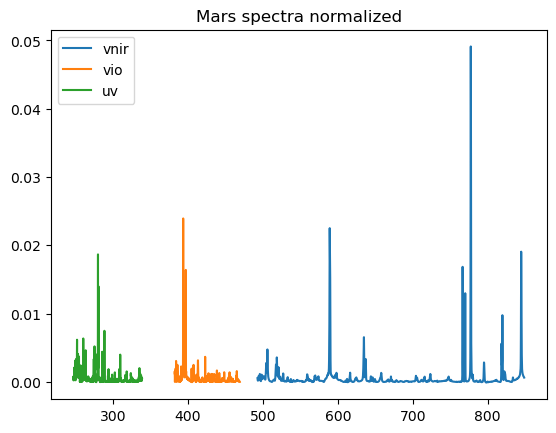

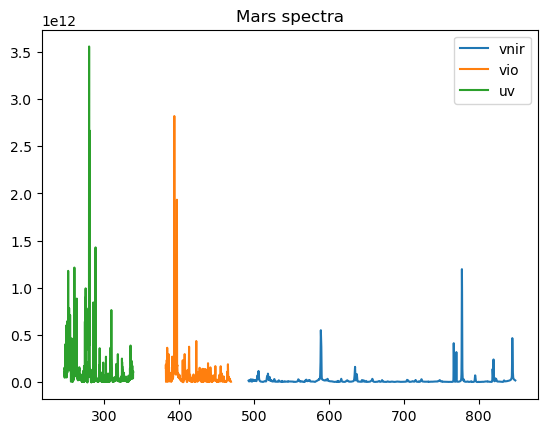

In [28]:
'''Similar plots for Mars spectra'''
plt.plot(mars_vnir_s.columns,mars_vnir_s.iloc[0,:], label="vnir")
plt.plot(mars_vio_s.columns,mars_vio_s.iloc[0,:], label="vio")
plt.plot(mars_uv_s.columns,mars_uv_s.iloc[0,:], label="uv")
plt.title("Mars spectra normalized")
plt.legend()

plt.figure()
# plt.yscale("log")
plt.plot(mars_vnir.columns,mars_vnir.iloc[0,:], label="vnir")
plt.plot(mars_vio.columns,mars_vio.iloc[0,:], label="vio")
plt.plot(mars_uv.columns,mars_uv.iloc[0,:], label="uv")
plt.title("Mars spectra")
plt.legend()

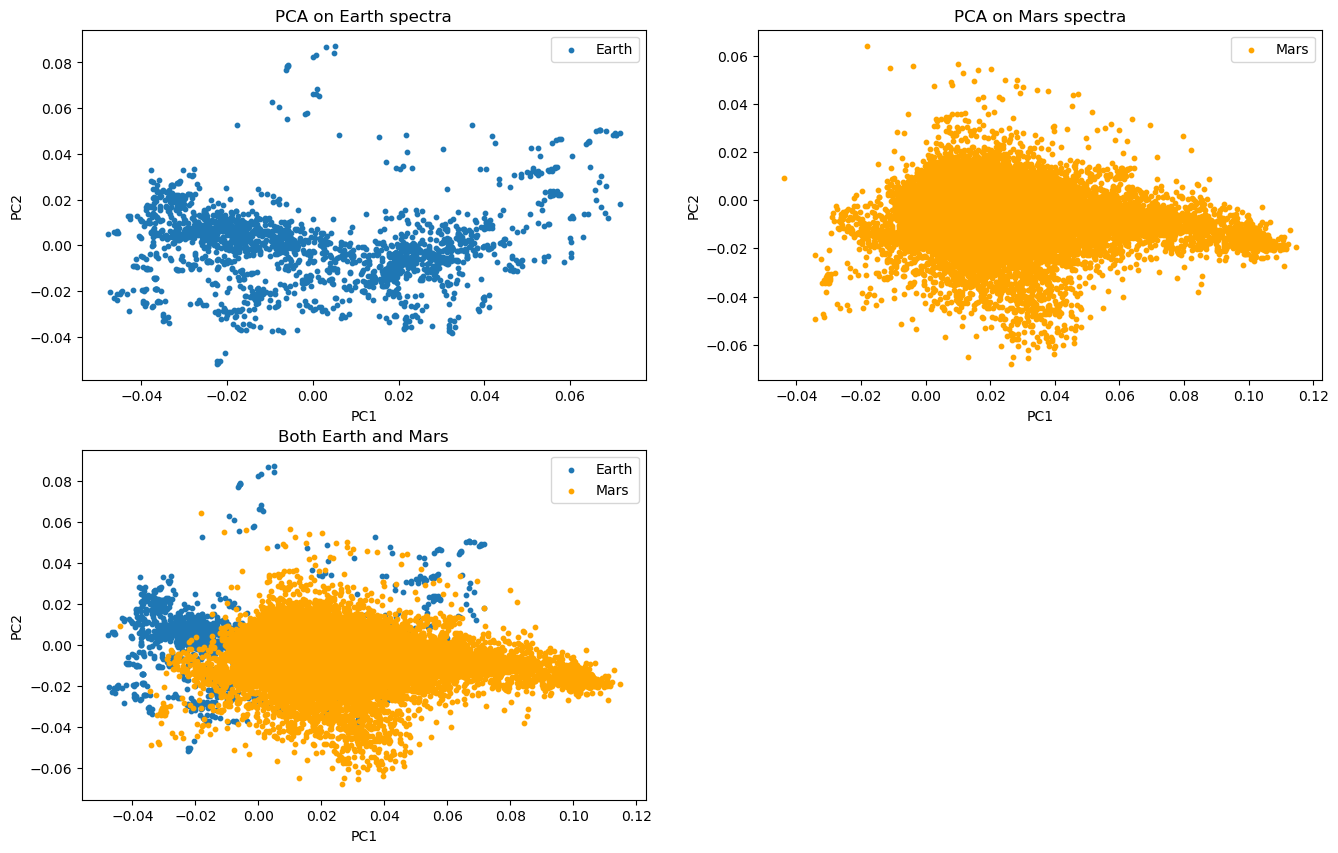

In [62]:
pca = PCA(n_components=2)
#earth_concat = pd.concat([earth_vnir_s,earth_uv_s,earth_vio_s], axis=1)
X_red_earth = pca.fit_transform(X_e)
X_red_mars = pca.transform(X_m)

# Earth only
plt.figure(figsize=(16, 10)) 
ax1 = plt.subplot(2,2,1)
ax1.scatter(X_red_earth[:,0],X_red_earth[:,1],s=10, label="Earth")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
ax1.set_title("PCA on Earth spectra")

# Mars
ax2 = plt.subplot(2,2,2)
ax2.scatter(X_red_mars[:,0],X_red_mars[:,1],s=10, color="orange", label="Mars")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
ax2.set_title("PCA on Mars spectra")

# Mars and Earth
ax3 = plt.subplot(2,2,3)
ax3.scatter(X_red_earth[:,0],X_red_earth[:,1],s=10, label="Earth")
plt.scatter(X_red_mars[:,0],X_red_mars[:,1],s=10, color="orange", label="Mars")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
ax3.set_title("Both Earth and Mars")

plt.savefig("PCA_earth_mars_spectra.png")

In [38]:
X_m.drop(columns=X_m.columns[-1:], axis=1, inplace=True)
X_e = pd.concat([earth_uv_s,earth_vio_s,earth_vnir_s],axis=1)
X_m = pd.concat([mars_uv_s,mars_vio_s,mars_vnir_s],axis=1)